<a href="https://colab.research.google.com/github/liobaDB/liobaDB/blob/main/SOY__CG_o3_mini_high_MAR3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


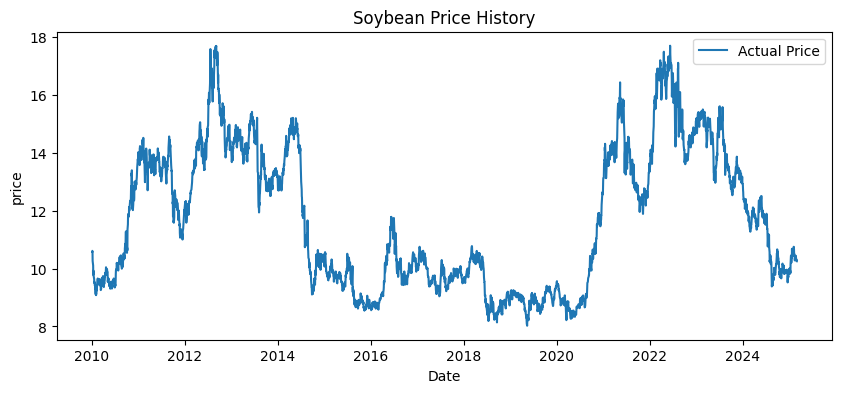

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the soybean CSV file
# Make sure your CSV has at least "Date" and "Price" columns.
df = pd.read_csv('/content/drive/MyDrive/2025/soybean_2025.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Plot the actual price data
plt.figure(figsize=(10,4))
plt.plot(df.index, df['price'], label='Actual Price')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Soybean Price History')
plt.legend()
plt.show()






In [ ]:
# Preprocess the data by scaling the price
data = df['price'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences:
# We use the past 12 months (input_steps) to predict the next 5 months (output_steps)
input_steps = 12
output_steps = 5
X, y = [], []
for i in range(len(scaled_data) - input_steps - output_steps + 1):
    X.append(scaled_data[i : i + input_steps])
    y.append(scaled_data[i + input_steps : i + input_steps + output_steps])
X = np.array(X)
y = np.array(y)

print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (3831, 12, 1)
Output shape: (3831, 5, 1)


In [ ]:
# Define model-building functions

def build_lstm_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(output_steps))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def build_gru_model():
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(input_steps, 1)))
    model.add(Dense(output_steps))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def build_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(input_steps, 1)))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(output_steps))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model


In [ ]:
# Build the models
lstm_model = build_lstm_model()
gru_model = build_gru_model()
cnn_model = build_cnn_model()

# Train the models
epochs = 50
batch_size = 16

print("Training LSTM...")
lstm_model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)

print("Training GRU...")
gru_model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)

print("Training CNN...")
cnn_model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)

# Forecast the next 5 months using the last available sequence
last_sequence = scaled_data[-input_steps:]
last_sequence = np.expand_dims(last_sequence, axis=0)

lstm_pred = lstm_model.predict(last_sequence)
gru_pred = gru_model.predict(last_sequence)
cnn_pred = cnn_model.predict(last_sequence)

# Inverse transform the predictions to get actual price values
lstm_pred_inv = scaler.inverse_transform(lstm_pred).flatten()
gru_pred_inv = scaler.inverse_transform(gru_pred).flatten()
cnn_pred_inv = scaler.inverse_transform(cnn_pred).flatten()

print("LSTM Prediction:", lstm_pred_inv)
print("GRU Prediction:", gru_pred_inv)
print("CNN Prediction:", cnn_pred_inv)



Training LSTM...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0429
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0018
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0015
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0015
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0013
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0013
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0013
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0012
Epoch 9/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012
Epoch 10/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012
Epoch 11/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012
Epoch 12/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0011
Epoch 13/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0012
Epoch 14/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0011
Epoch 15/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0

In [ ]:
# Create future date index for next 5 months
last_date = df.index[-1]

#future_dates = pd.date_range(last_date, periods=output_steps+1, freq='M')[1:]  # exclude the last_date
future_dates = pd.date_range(last_date, periods=output_steps+1, freq='M')[1:]

# Plot actual data and forecasts

<ipython-input-31-dabcdd6f6bb9>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date, periods=output_steps+1, freq='M')[1:]


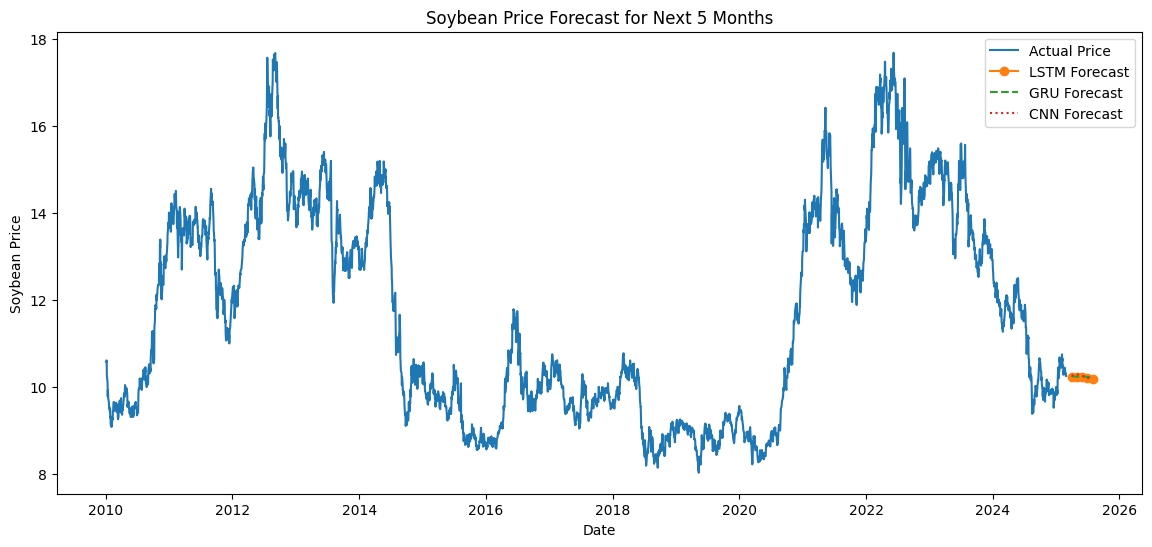

In [ ]:
# Plot actual data and forecasts
#plt.figure(figsize=(10,6))
plt.figure(figsize=(14,6))
plt.plot(df.index, df['price'], label='Actual Price')
plt.plot(future_dates, lstm_pred_inv, marker='o', label='LSTM Forecast')
plt.plot(future_dates, gru_pred_inv, label='GRU Forecast', linestyle="dashed")
plt.plot(future_dates, cnn_pred_inv,  label='CNN Forecast', linestyle='dotted' )
plt.xlabel('Date')
plt.ylabel('Soybean Price')
plt.title('Soybean Price Forecast for Next 5 Months')
plt.legend()
plt.show()